# Data Agumentation Problem
#### Here you need to compare two models with and without agumentation to see the difference

### Import libraries

In [2]:
import glob
import cv2
import numpy as np
import random
from google.colab import drive
drive.mount('/content/drive')
import os

### Read images

In [12]:
# First we should read all the images from the provided directory,

# 1. first unzip the .zip file attached with homeworks
!unzip "drive/MyDrive/data/HW3.zip"

# 2. read images from directory
images = []
dataset = os.listdir("./data_aug")

# 3. create labels array
labels=[]
for image in dataset:
    images.append(cv2.imread(os.path.join("./data_aug", image)))
    label = image.split('.')[0]
    if label == 'cat':
        labels.append(0)
    else:
        labels.append(1)

Archive:  drive/MyDrive/data/HW3.zip
  inflating: data_aug/cat.7305.jpg   
  inflating: data_aug/dog.12247.jpg  
  inflating: data_aug/dog.306.jpg    
  inflating: data_aug/cat.4344.jpg   
  inflating: data_aug/cat.1807.jpg   
  inflating: data_aug/dog.11833.jpg  
  inflating: data_aug/cat.5077.jpg   
  inflating: data_aug/dog.10221.jpg  
  inflating: data_aug/dog.6503.jpg   
  inflating: data_aug/cat.5009.jpg   
  inflating: data_aug/cat.7738.jpg   
  inflating: data_aug/dog.9719.jpg   
  inflating: data_aug/dog.9374.jpg   
  inflating: data_aug/cat.10172.jpg  
  inflating: data_aug/cat.2482.jpg   
  inflating: data_aug/dog.42.jpg     
  inflating: data_aug/cat.1021.jpg   
  inflating: data_aug/dog.658.jpg    
  inflating: data_aug/dog.1989.jpg   
  inflating: data_aug/dog.6891.jpg   
  inflating: data_aug/dog.301.jpg    
  inflating: data_aug/cat.1666.jpg   
  inflating: data_aug/dog.4439.jpg   
  inflating: data_aug/cat.6706.jpg   
  inflating: data_aug/cat.11843.jpg  
  inflating: 

### Prepare Dataset

In [107]:
# Normalize your dataset in a way to have a image dataset with pixles in range (0 to 1)

images = np.divide(images, 255)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


In [108]:
# Resize your images to (28 * 28)

x_train = []
for image in images:
  x_train.append(cv2.resize(image, (28, 28)))

In [109]:
# Flatten your dataset images 

x_train = np.array(x_train)
y_train = np.array(labels)
x_train = x_train.flatten().reshape(100, 2352)
y_train = y_train.flatten()

In [110]:
# Check your dataset and labels to be a numpy ndarray of sizes (100, 28 * 28 * 3) and (100, 1) respectively.

print(x_train.shape)
print(y_train.shape)

(100, 2352)
(100,)


### Create your Model

In [103]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers

In [112]:
# create a simple model of Keras MLP with desired number of dense layers and units and activation function
# don't forget to shuffle the data
# this is a binary classification problem

model_temp_1 = Sequential()
model_temp_1.add(Dense(512, input_shape=(2352, ), activation='relu'))
model_temp_1.add(Dense(16, activation='relu'))
model_temp_1.add(Dense(1, activation='sigmoid'))

In [113]:
# Split your dataset to test and train with your desired implementation
# use sklearn.model_selection.train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.33)

In [114]:
# Compile with your desired optimizer and loss function with 'accuracy' as metric
# # Don't forget to monitor the overfitting, you should take care of val_accuracy and val_loss

model_temp_1.compile(
    loss='binary_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)
history = model_temp_1.fit(
      x_train, 
      y_train,
      epochs=50,
      validation_split=0.2,
      shuffle=True,
      verbose=2
)

Epoch 1/50
2/2 - 1s - loss: 1.1977 - accuracy: 0.5283 - val_loss: 1.6105 - val_accuracy: 0.3571 - 795ms/epoch - 398ms/step
Epoch 2/50
2/2 - 0s - loss: 1.2946 - accuracy: 0.4906 - val_loss: 0.6882 - val_accuracy: 0.6429 - 43ms/epoch - 21ms/step
Epoch 3/50
2/2 - 0s - loss: 0.7566 - accuracy: 0.5283 - val_loss: 0.7058 - val_accuracy: 0.6429 - 46ms/epoch - 23ms/step
Epoch 4/50
2/2 - 0s - loss: 0.7425 - accuracy: 0.5094 - val_loss: 0.6869 - val_accuracy: 0.6429 - 55ms/epoch - 28ms/step
Epoch 5/50
2/2 - 0s - loss: 0.6821 - accuracy: 0.5472 - val_loss: 0.7095 - val_accuracy: 0.6429 - 45ms/epoch - 23ms/step
Epoch 6/50
2/2 - 0s - loss: 0.6754 - accuracy: 0.6415 - val_loss: 0.7785 - val_accuracy: 0.3571 - 50ms/epoch - 25ms/step
Epoch 7/50
2/2 - 0s - loss: 0.6936 - accuracy: 0.5094 - val_loss: 0.7425 - val_accuracy: 0.3571 - 52ms/epoch - 26ms/step
Epoch 8/50
2/2 - 0s - loss: 0.6573 - accuracy: 0.6226 - val_loss: 0.6983 - val_accuracy: 0.5000 - 45ms/epoch - 23ms/step
Epoch 9/50
2/2 - 0s - loss: 0.

### Plot results

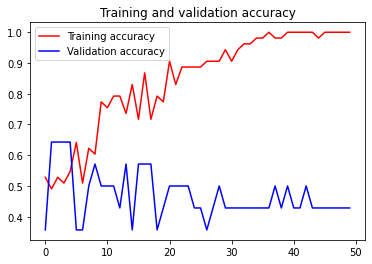

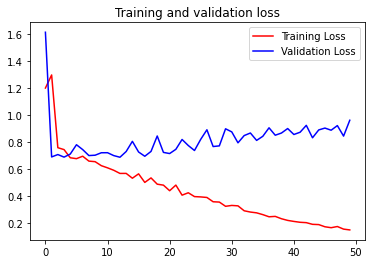

In [115]:
# Plot your data

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Evaluate results

In [116]:
# Evaluate your model on the test data

test_evaluate = model_temp_1.evaluate(x_test, y_test)
print("Test evaluation is: ", test_evaluate)

2/2 [==============================] - 0s 7ms/step - loss: 1.0000 - accuracy: 0.4242
Test evaluation is:  [0.9999938607215881, 0.42424243688583374]


# Compare results with and without using agumentation
### Now we need to do agumentation to create more images to help us overcome underfitting

### Agumentation Methods
Here you should do the agumentation methods to produce more images


In [3]:
# In this cell you need to implement agumentation methods to increase our data
# NOTICE! Only use libraries in CV2 or others, DON'T use KERAS and Pytorch!


def fill(img, h, w):
    ''' 
    we use this function to resize the shifted image and fill border pixles with different methods
    
    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
          h: an integer defining the height of target image
          w: an integer defining the width of target image
    
    output: resized and interpolated image 

    '''
        
    img = cv2.resize(img, (h, w), cv2.INTER_CUBIC)
    return img


def horizontal_shift(img, ratio=0.5):

    ''' 
    we use this function to shift the image horizontally with the given ratio
    width_target = width_input - ratio * width_input
    
    Hint: select ratio in range (-ratio to ratio) uniformly, to simulate horizontally shift to right and left with different ratios


    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
          ratio: a float number between 0 and 1
    
    output: resized and interpolated image 

    '''
    
    if ratio > 1 or ratio < 0:
        print('Value should be less than 1 and greater than 0')
        return img
    ratio = random.uniform(-ratio, ratio) # you can change this
    h, w = img.shape[:2]
    to_shift = w*ratio
    if ratio > 0:
        img = img[:, :int(w-to_shift), :]
    if ratio < 0:
        img = img[:, int(-1*to_shift):, :]

    img = fill(img, h, w) # fill image borders

    return img


In [4]:
    
def vertical_shift(img, ratio=0.5):

    ''' 
    we use this function to shift the image vertically with the given ratio
    width_target = width_input - ratio * width_input
    
    Hint: select ratio in range (-ratio to ratio) uniformly, to simulate vertically shift to up and down with different ratios


    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
          ratio: a float number between 0 and 1
    
    output: resized and interpolated image 

    '''

    if ratio > 1 or ratio < 0:
        print('Value should be less than 1 and greater than 0')
        return img
    ratio = random.uniform(-ratio, ratio)
    h, w = img.shape[:2]
    to_shift = h*ratio
    if ratio > 0:
        img = img[:int(h-to_shift), :, :]
    if ratio < 0:
        img = img[int(-1*to_shift):, :, :]
        
    img = fill(img, h, w)

    return img



In [5]:
def brightness(img, low, high):

    ''' 
    we use this function to change the brightness of the image with given high and low values
    
    Hint: first convert to HSV color domain, Next make your image brighter or darker then convert back to BGR

    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
          low:
          high:
    
    output: image with different brightness

    '''

    value = random.uniform(low, high)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv = np.array(hsv, dtype = np.float64)
    hsv[:,:,1] = hsv[:,:,1]*value
    hsv[:,:,1][hsv[:,:,1]>255]  = 255
    hsv[:,:,2] = hsv[:,:,2]*value 
    hsv[:,:,2][hsv[:,:,2]>255]  = 255
    hsv = np.array(hsv, dtype = np.uint8)
    img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    
    return img

In [6]:

def zoom(img, value):

    ''' 
    we use this function to zoom the image with given value
    
    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
          value: an integer number indicating the zoom effect
    
    output: zoomed image

    '''
    
    if value > 1 or value < 0:
        print('Value for zoom should be less than 1 and greater than 0')
        return img
    value = random.uniform(value, 1)
    h, w = img.shape[:2]
    h_taken = int(value*h)
    w_taken = int(value*w)
    h_start = random.randint(0, h-h_taken)
    w_start = random.randint(0, w-w_taken)
    img = img[h_start:h_start+h_taken, w_start:w_start+w_taken, :]
    
    img = fill(img, h, w)

    return img

In [7]:
def channel_shift(img, value):

    ''' 
    we use this function to shift color channels to play with colors in the image
    
    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
          value: an integer number indicating the color change effect
    
    output: image with changed colors

    '''
    
    value = int(random.uniform(-value, value))
    img = img + value
    img[:,:,:][img[:,:,:]>255]  = 255
    img[:,:,:][img[:,:,:]<0]  = 0
    img = img.astype(np.uint8)
    
    return img

In [8]:
def horizontal_flip(img):

    ''' 
    we use this function to flip the image horizontally

    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
    
    output: horizontally fliped image

    '''

    return cv2.flip(img, 1)


In [9]:
def vertical_flip(img):

    ''' 
    we use this function to flip the image vertically
    
    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
    
    output: vertically fliped image

    '''
    
    return cv2.flip(img, 0)


### Prepare your dataset

In [69]:
# For each image in our dataset run the previous methods and create a new dataset

images_2 = []
for image in images:
  images_2.append(image)
  images_2.append(horizontal_shift(image))
  images_2.append(vertical_shift(image))
  images_2.append(brightness(image, 15, 30))
  images_2.append(zoom(image, 0.4))
  images_2.append(channel_shift(image, 7))
  images_2.append(horizontal_flip(image))
  images_2.append(vertical_flip(image))

In [70]:

# Extend your labels array new size with correct labels maped to each agumented image
labels_2 = []
for label in labels:
  labels_2.append(label)
  labels_2.append(label)
  labels_2.append(label)
  labels_2.append(label)
  labels_2.append(label)
  labels_2.append(label)
  labels_2.append(label)
  labels_2.append(label)

In [71]:
# Normalize your dataset in a way to have a image dataset with pixles in range (0 to 1)

images_2 = np.divide(images_2, 255)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


In [72]:
# Resize your images to (28 * 28)

x_train_2 = []
for image in images_2:
  x_train_2.append(cv2.resize(image, (28, 28)))

In [73]:
# Flatten your dataset images 

x_train_2 = np.array(x_train_2)
y_train_2 = np.array(labels_2)
x_train_2 = x_train_2.flatten().reshape(800, 2352)
y_train_2 = y_train_2.flatten()

In [64]:
# Check your dataset and labels to be a numpy ndarray of sizes (800, 28 * 28 * 3) and (800, 1) respectively.

print(x_train_2.shape)
print(y_train_2.shape)

(800, 2352)
(800,)


### Create your model

In [80]:
# create a simple model of Keras MLP with desired number of dense layers and units and activation function
# don't forget to shuffle the data
# this is a binary classification problem

model_temp_2 = Sequential()
model_temp_2.add(Dense(512, input_shape=(2352, ), activation='relu'))
model_temp_2.add(Dense(16, activation='relu'))
model_temp_2.add(Dense(1, activation='sigmoid'))

In [81]:
# Split your dataset to test and train with the desired implementation
# use sklearn.model_selection.train_test_split

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_train_2, y_train_2, test_size=0.33)

In [82]:
# Compile your model to introduce loss function optimizer and metrices to monitor accuracy metric and train on the data
# Don't forget to monitor the overfitting, you should take care of val_accuracy and val_loss

model_temp_2.compile(
    loss='binary_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)
history = model_temp_2.fit(
      x_train_2, 
      y_train_2,
      epochs=50,
      validation_split=0.2,
      shuffle=True,
      verbose=2
)

Epoch 1/50
9/9 - 1s - loss: 1.0402 - accuracy: 0.5087 - val_loss: 0.8829 - val_accuracy: 0.4722 - 1s/epoch - 154ms/step
Epoch 2/50
9/9 - 0s - loss: 0.6995 - accuracy: 0.5923 - val_loss: 0.7316 - val_accuracy: 0.5000 - 111ms/epoch - 12ms/step
Epoch 3/50
9/9 - 0s - loss: 0.6618 - accuracy: 0.5784 - val_loss: 0.6557 - val_accuracy: 0.5556 - 121ms/epoch - 13ms/step
Epoch 4/50
9/9 - 0s - loss: 0.6362 - accuracy: 0.6481 - val_loss: 0.6346 - val_accuracy: 0.6250 - 112ms/epoch - 12ms/step
Epoch 5/50
9/9 - 0s - loss: 0.6757 - accuracy: 0.6098 - val_loss: 0.6729 - val_accuracy: 0.5000 - 126ms/epoch - 14ms/step
Epoch 6/50
9/9 - 0s - loss: 0.7454 - accuracy: 0.5401 - val_loss: 0.6469 - val_accuracy: 0.5556 - 125ms/epoch - 14ms/step
Epoch 7/50
9/9 - 0s - loss: 0.5863 - accuracy: 0.6794 - val_loss: 0.7433 - val_accuracy: 0.5000 - 105ms/epoch - 12ms/step
Epoch 8/50
9/9 - 0s - loss: 0.6136 - accuracy: 0.6655 - val_loss: 0.7845 - val_accuracy: 0.4861 - 105ms/epoch - 12ms/step
Epoch 9/50
9/9 - 0s - loss

### Plot your results

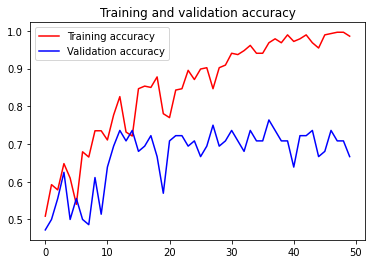

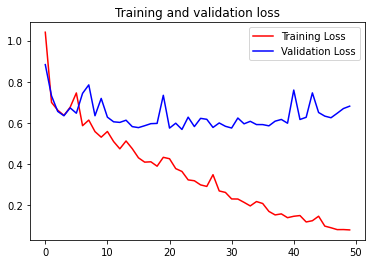

In [83]:
# Plot your data

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Evaluate results

In [84]:
# Evaluate your model on the test data

test_evaluate_2 = model_temp_2.evaluate(x_test_2, y_test_2)
print("Test evaluation is: ", test_evaluate_2)

6/6 [==============================] - 0s 6ms/step - loss: 0.6737 - accuracy: 0.6780
Test evaluation is:  [0.673651933670044, 0.6779661178588867]


# Compare your results with and without using agumentation to see the difference

## Optional Bonus Activity

In [ ]:
# Optional

# Keras data Augmentation

#use the bellow links

# https://keras.io/guides/keras_cv/custom_image_augmentations/

# https://keras.io/api/preprocessing/image/

In [97]:
!unzip "drive/MyDrive/data/HW3_2.zip"
dataset_3 = tf.keras.preprocessing.image_dataset_from_directory(
    "./data_aug",
    seed=30,
    image_size=(28, 28),
    batch_size=100
)

Archive:  drive/MyDrive/data/HW3_2.zip
replace data_aug/cat/cat.10172.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: data_aug/cat/cat.10172.jpg  
  inflating: data_aug/cat/cat.10195.jpg  
  inflating: data_aug/cat/cat.1021.jpg  
  inflating: data_aug/cat/cat.10949.jpg  
  inflating: data_aug/cat/cat.11521.jpg  
  inflating: data_aug/cat/cat.11535.jpg  
  inflating: data_aug/cat/cat.11843.jpg  
  inflating: data_aug/cat/cat.119.jpg  
  inflating: data_aug/cat/cat.11946.jpg  
  inflating: data_aug/cat/cat.11959.jpg  
  inflating: data_aug/cat/cat.12263.jpg  
  inflating: data_aug/cat/cat.12479.jpg  
  inflating: data_aug/cat/cat.1666.jpg  
  inflating: data_aug/cat/cat.1807.jpg  
  inflating: data_aug/cat/cat.1848.jpg  
  inflating: data_aug/cat/cat.2098.jpg  
  inflating: data_aug/cat/cat.223.jpg  
  inflating: data_aug/cat/cat.225.jpg  
  inflating: data_aug/cat/cat.2326.jpg  
  inflating: data_aug/cat/cat.2479.jpg  
  inflating: data_aug/cat/cat.2482.jpg  
  inflating: data

In [98]:
print(len(os.listdir('./data_aug/dog')))
print(len(os.listdir('./data_aug/cat')))

50
50


In [99]:
class_names = dataset_3.class_names
print(class_names)

['cat', 'dog']


In [123]:
for image, label in dataset_3:
  print(image.shape)
  print(label.shape)
  break

(100, 28, 28, 3)
(100,)


In [134]:
normalization = tf.keras.layers.Rescaling(1./255)
normalized_dataset_3 = dataset_3.map(lambda x, y: (normalization(x), y))
x_train_3, y_train_3 = next(iter(normalized_dataset_3))

In [135]:
x_train_3 = np.array(x_train_3)
y_train_3 = np.array(y_train_3)
x_train_3 = x_train_3.flatten().reshape(100, 2352)
print(x_train_3.shape)
print(y_train_3.shape)

(100, 2352)
(100,)


In [136]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [137]:
resize_images = tf.keras.Sequential([
  layers.Resizing(25, 25)
])

In [138]:
model_temp_3 = tf.keras.Sequential([
  Dense(512, input_shape=(2352,), activation='relu'),
  Dense(16, kernel_initializer='normal', activation='relu'),
  Dense(1, kernel_initializer='normal', activation='sigmoid')
])

In [139]:
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_train_3, y_train_3, test_size=0.33)

In [140]:
model_temp_3.compile(
  loss='binary_crossentropy', 
  optimizer='adam', 
  metrics=['accuracy']
)
history = model_temp_3.fit(
  x_train_3,
  y_train_3,
  epochs=50,
  batch_size=5,
  validation_split=0.2,
  shuffle=True,
  verbose=2
)

Epoch 1/50
11/11 - 1s - loss: 0.6955 - accuracy: 0.4906 - val_loss: 0.6931 - val_accuracy: 0.5000 - 780ms/epoch - 71ms/step
Epoch 2/50
11/11 - 0s - loss: 0.6932 - accuracy: 0.4528 - val_loss: 0.6931 - val_accuracy: 0.5000 - 96ms/epoch - 9ms/step
Epoch 3/50
11/11 - 0s - loss: 0.6932 - accuracy: 0.5094 - val_loss: 0.6931 - val_accuracy: 0.5000 - 111ms/epoch - 10ms/step
Epoch 4/50
11/11 - 0s - loss: 0.6932 - accuracy: 0.5094 - val_loss: 0.6931 - val_accuracy: 0.5000 - 100ms/epoch - 9ms/step
Epoch 5/50
11/11 - 0s - loss: 0.6931 - accuracy: 0.5094 - val_loss: 0.6931 - val_accuracy: 0.5000 - 99ms/epoch - 9ms/step
Epoch 6/50
11/11 - 0s - loss: 0.6931 - accuracy: 0.5094 - val_loss: 0.6931 - val_accuracy: 0.5000 - 123ms/epoch - 11ms/step
Epoch 7/50
11/11 - 0s - loss: 0.6931 - accuracy: 0.5094 - val_loss: 0.6931 - val_accuracy: 0.5000 - 129ms/epoch - 12ms/step
Epoch 8/50
11/11 - 0s - loss: 0.6931 - accuracy: 0.5094 - val_loss: 0.6931 - val_accuracy: 0.5000 - 124ms/epoch - 11ms/step
Epoch 9/50
11

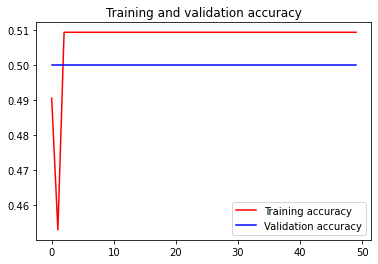

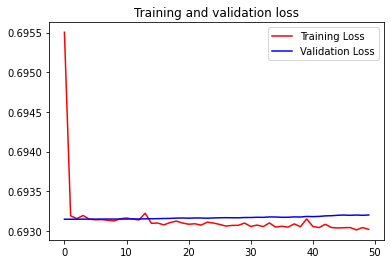

In [141]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [142]:
test_evaluate_3 = model_temp_3.evaluate(x_test_3, y_test_3)
print("Test evaluation is: ", test_evaluate_3)

2/2 [==============================] - 0s 9ms/step - loss: 0.6935 - accuracy: 0.4848
Test evaluation is:  [0.6935147047042847, 0.4848484992980957]
